# Exploring the Titanic Data Set

## Learning Goals


- plot categorical and numerical data
- understand the difference between bar charts and histograms
- apply groupby()
- create and interpret box plots
- create and interpret violin plots
- create and interpret swarm plots
- separate plots into subplots on an additional variable
- create a new variable from existing variables in a data frame


The RMS Titanic was a British passenger liner that sank after colliding with an iceberg in the North Atlantic Ocean on April 15, 1912.  It carried over two thousand passengers and the majority perished.  It remains the deadliest peacetime sinking of an ocean liner.  Passengers included some of the wealthiest individuals in the world as well as hundreds of emigrants from Great Britain, Ireland and Scandanavia who were seeking a new life in the Unites States.

A fatal flaw in the expedition was the number and quality of lifeboats.  The ship carried only 20, capable of holding only about half the number of passengers on board.  At the time, this was in line with the Board of Trade's safety regulation.  Lifeboats were intended to ferry survivors from a sinking ship to a rescue ship, not keep afloat the entire population or transport them to shore.


The Titanic Dataset is one of the most popular datasets used for understanding machine learning basics. It contains information of many of the passengers aboard the RMS Titanic, though the exact number of people aboard is not known, as not all of those who had booked tickets made it to the ship and not all of those who boarded stayed aboard for the entire journey.  It is prominently featured on Kaggle as a first challenge and can be found here: https://www.kaggle.com/c/titanic.  We will work only on the training set.  (For machine learning projects, data is split into a training set and a test set, and Kaggle provides both separately.)  This is important to note, because the total counts will be smaller than if we were working on the entire data set which represents all passengers.

We are interested in the survival relationship between other features such as age, socio-economic class, etc.  For this exercise, we will not write machine learning code, but we will use an exploratory analysis to determine which features impact survival rate, and how these features are correlated.


## Load Packages and Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plots will be displayed in this Jupyter notebook
%matplotlib inline 

In [4]:
# set defined plot sizes and styles
plt.rcParams['figure.figsize'] = [6,3] # figures will be 6 units in length 3 units in height
plt.rcParams['figure.dpi'] = 80 # default is 72 in webpages, we wish to see in higher resolution

In [5]:
# titanic data set is part of Seaborn
titanic = sns.load_dataset('titanic')

In [6]:
# look at the first few lines
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
# determine features in the data set
cols = titanic.columns
print(cols)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [8]:
# describe will only represent the numerical columns-- for example, sex, class, embark town, etc. are not included
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Notice that alothough some variables have 891 entries, age only has 714, meaning 177 entires lack age information (null entries).  We can also see this with the info() method.


In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


We see that age, deck, and embark_town all have null values (177, 688, 2 null values, respectively).  We can also see how much memory this data set takes (80.7 KB).

### Heatmap

In [10]:
plt.style.use('ggplot')

In [11]:
titanic.isnull()
# if the entry is null, this returns true, if the entry is not null, it returns false

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
# get the total number of null entries per feature
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

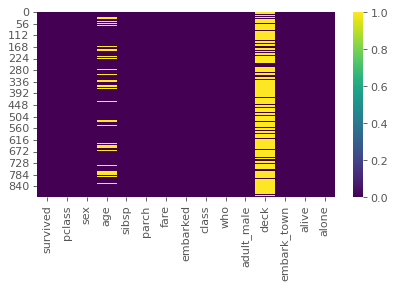

In [52]:
sns.heatmap(titanic.isnull(), cmap = 'viridis', cbar = True)
# viridis is a color palette, cbar = True gives the color bar on the right.  
# To remove it, set cbar = False
plt.show()

The above is a nice visualization, but due to the density of entries, the 2 null values in embark_town don't show up.  Looking at both the titanic.isnull().sum() output and the heatmap provides a complete picture.

We will now print a heat map of numerical data to determine correlations.  The Pearson correlation coefficient can only be determined for numerical data.  For categorical data, there are other metrics to measure correlation, such Cramer’s V or the phi coefficient (if both variables are categorical) or the point-biserial correlation coefficient (if one variable is binary and the other is continuous).  We will not focus on those metrics in this activity, but want to emphasize that there are other possible measures of correlation.

In [15]:
# correlation matrix which returns correlation coefficient for numerical features
corrmat = titanic.corr()
corrmat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


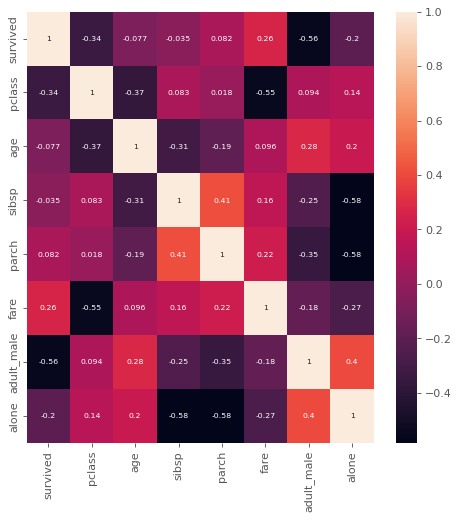

In [163]:
# plot as a heat map to visualize the information in the matrix
fig, ax = plt.subplots(figsize = (7, 7)) 
sns.heatmap(corrmat, annot = True, annot_kws = {'size': 7}) # annot = True plots the correlation value in each cell
# annot_kws lets us control the size of the text
plt.show()

### Univariate Analysis

In [17]:
print(list(cols)) # put the columns in a list and print it

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


/Users/kamilalarripa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/kamilalarripa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


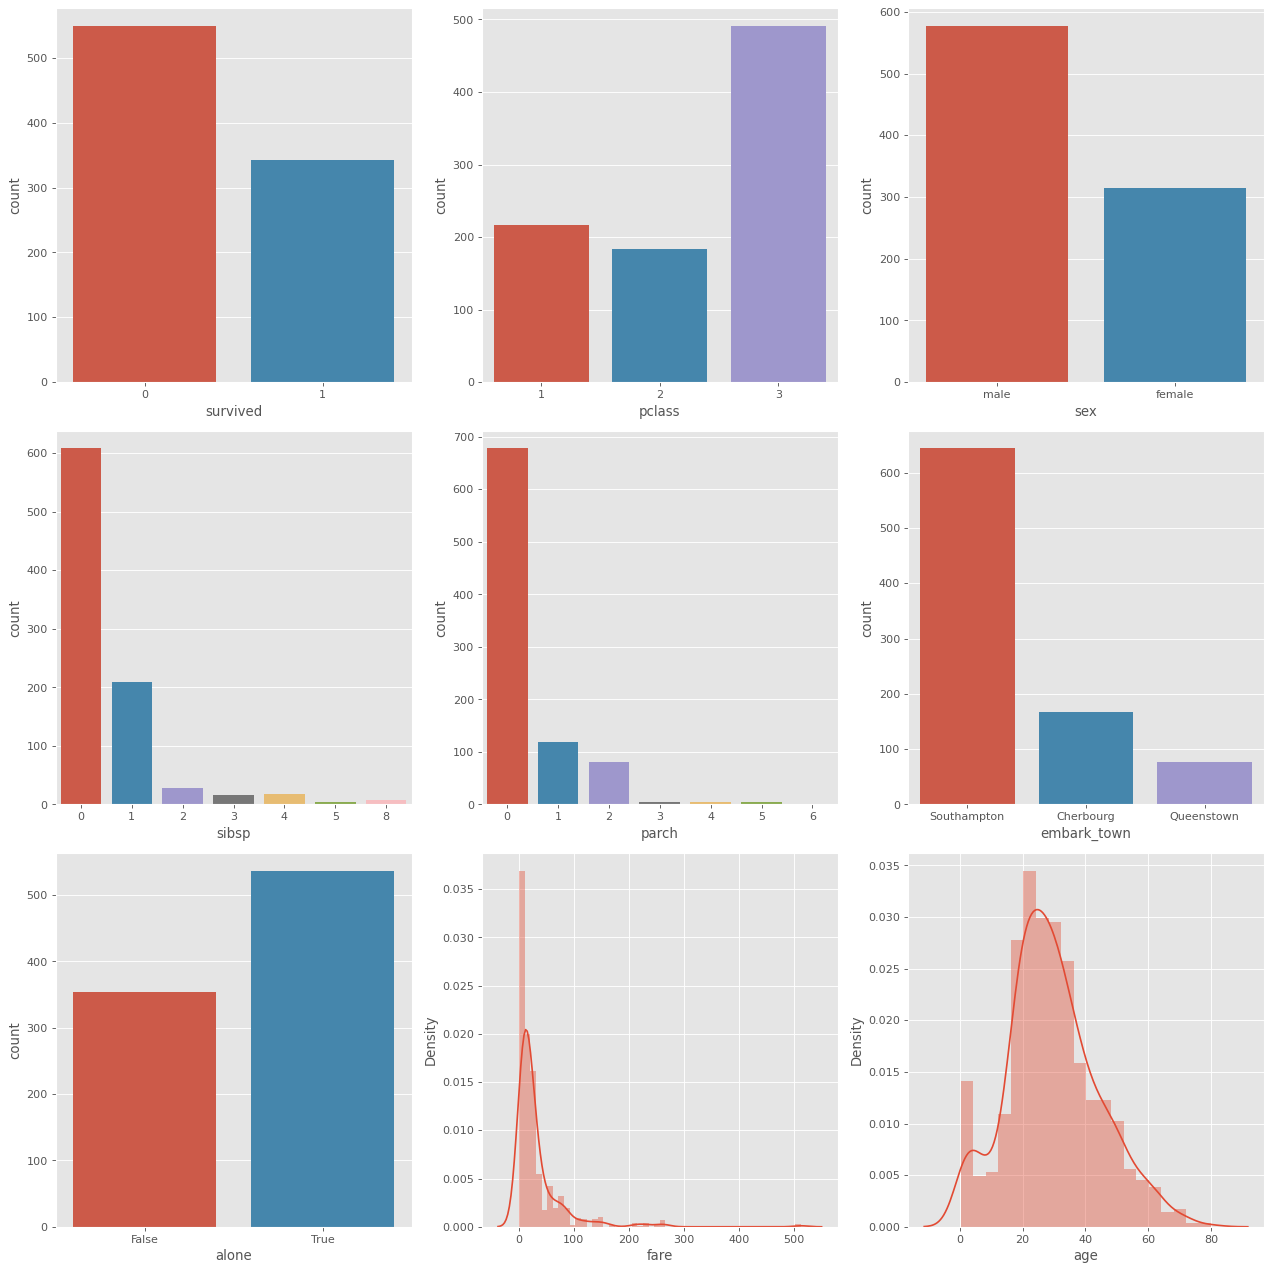

In [25]:
fig, ax = plt.subplots(3, 3, figsize = (16, 16))
# set to have 3 rows and 3 columns of subplots and set size of each to be 16 x 16

# plot categorical

# the ax[0][0] tells us to put the subplot in the 0th row, 0th column (indices start at 0)
sns.countplot(x ='survived', data = titanic, ax = ax[0][0])
sns.countplot(x ='pclass', data = titanic, ax = ax[0][1]) 
sns.countplot(x ='sex', data = titanic, ax = ax[0][2])
sns.countplot(x ='sibsp', data = titanic, ax = ax[1][0]) # sibling/spouse
sns.countplot(x ='parch', data = titanic, ax = ax[1][1]) # parent/child
sns.countplot(x ='embark_town', data = titanic, ax = ax[1][2])
sns.countplot(x ='alone', data = titanic, ax = ax[2][0])

# plot numerical
sns.distplot(titanic['fare'], kde = True, ax = ax[2][1])
sns.distplot(titanic['age'], kde = True, ax = ax[2][2])

plt.tight_layout() # automatically adjusts subplot parameters so it fits in the figure area

Observations: The first figure shows out of 891 passengers, around 350 survived (blue bar).  The second figure shows us how the classes were distributed, with the third class (purple bar) being the most popular.  The 6th figures shows most people boarded the ship at Southampton (a port in England).
In the fare plot, most fares were quite low, and a few were high.  First class accomodations included access to a squash court, gym, a swimming pool, shuffleboard and chess, whereas second and third class passengers could not access these amenities.
Looking at the age plot, we see a spike around 5-10 years representing children.

### Survival
We have a sense of this information from the first subplot above, but to get exact values, it is useful to use the value_counts() method.

In [26]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

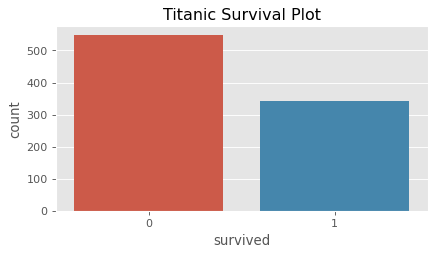

In [27]:
# recreate the first subplot with a title
sns.countplot(x = 'survived', data = titanic)
plt.title('Titanic Survival Plot')
plt.show() # removes text in output

Bar charts look similar to histograms, but there are some fundamental differences.  Bar charts work well for comparisons across categories.  Histograms visualize numerical data whereas bar charts display categorical variables.  In most instances, the numerical data in a histogram will be continuous, and is grouped into bins.  However, if your numerical data is discrete, the distinction between bar plots and histograms is less obvious.
For survival counts, the data set uses the value 0 for not survived and the value 1 for survived.  So even though these are categories (not survived, survived), they have been assigned a numerical value.
There are a few general rules for histograms:
- Don't reorder the bars in a histogram.  Stated alternatively, the x-axis has an inherent ordering because the underlying data is assumed to be continuous, and this ordering must be preserved.
- For a bar chart, it is okay to reorder the bars.  For example, it would not matter if the blue bar for surivors was on the left instead of the right.  We would still understand the meaning of the graph.
- A histogram can have unequal bar widths if the bin intervals are different.  Bar charts should have the same width bars.
- Generally, histograms do not have space between the bars (this illustrates that the data is continious along the x-axis), but bar charts do have a gap between the bars.  In cases where no data falls within a bin, there will of course be gaps, but this is not a stylistic choice.

For the survival plot, a bar chart is more appropriate because the 0 and 1 applied to the two categories are simply encoding them.
We will use a histogram when analyzing age, which is a continuous variable, below (in the category "Age").

Pie plots are helpful for showing the percentages of different categories.

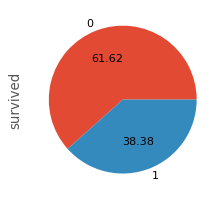

In [37]:
# pie plot
titanic['survived'].value_counts().plot.pie(autopct = '%1.2f')
plt.show()

### Class

In [38]:
titanic['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

The Pandas function groupby() is used for grouping the data according to the categories and apply a function to the categories. It also helps to aggregate data efficiently.

In [40]:
titanic.groupby(['pclass', 'survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

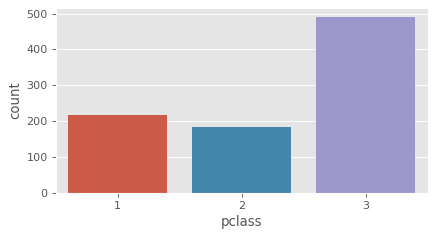

In [42]:
# general counts in each class
sns.countplot(x ='pclass', data = titanic)
plt.show()

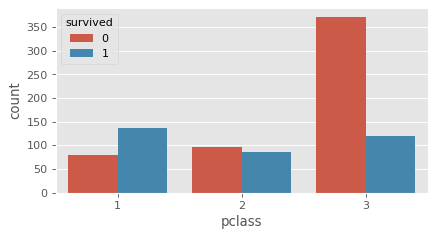

In [43]:
# survival by class
sns.countplot(x = 'pclass', data = titanic, hue = 'survived') # hue says plot bars based on who survived
plt.show()

One reason why many more of the third class passengers died compared to the first- and second-class members was that the third-class passengers were confined to their area of the Titanic.

Grilled gates had been installed in the lower decks to keep different classes of passengers from interacting with each other. Although stewards had keys to unlock the gates during an emergency, they did not have time to unlock all of them as the Titanic filled up with water after hitting an iceberg.

Those stuck in the lower decks had no idea what was happening and were left trapped and confused.

Additionally, communication between the crew and the third class was challenging. There was no intercom in 1912, and the third class included passengers who spoke everything from English to Swedish to Italian to Lebanese to Chinese. The crew spoke mostly English. There had never been a lifeboat/evacuation drill for any passengers. No one knew where to go. 

In general, even in contemporary times, socioeconomic status is a primary determinant of health and lifespan (Dorling, 2013).

Note that this exploratory data visualization makes clear the fact that class plays a role in an individual's likelihood of surviving the disaster.  

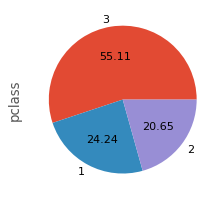

In [48]:
# pie chart
titanic['pclass'].value_counts().plot.pie(autopct = "%1.2f")
plt.show()

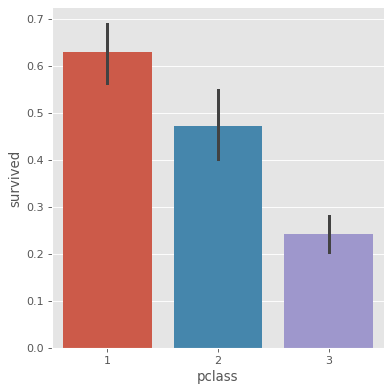

In [50]:
# probability of survival
sns.catplot(x = 'pclass', y = 'survived', kind = 'bar', data = titanic)
plt.show()

This shows that first class passengers have a 63% chance of survival, and the survival rate decreases across classes.

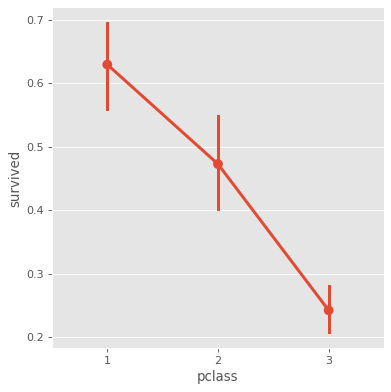

In [55]:
# point plot
sns.catplot(x = 'pclass', y = 'survived', kind = 'point', data = titanic)
plt.show()

The plot above shows the same information as the previous plot, but in a different format.  The trend is clear: as class changes, survival rates drop dramatically.

### Male versus Female

In [57]:
# get number of each sex
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [59]:
# groupby
titanic.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

In [166]:
unstacked_titanic = titanic.groupby(['sex', 'survived']).size().unstack('survived')
# make a new column with survival percentage
unstacked_titanic['survival_percentage'] = 100 * unstacked_titanic[1]/(unstacked_titanic[0]+ unstacked_titanic[1])
unstacked_titanic

survived,0,1,survival_percentage
sex,,,
female,81,233,74.203822
male,468,109,18.890815


This tells us that out of 314 females, 233 survived (74%).  Out of 577 males, 109 survived (19%).

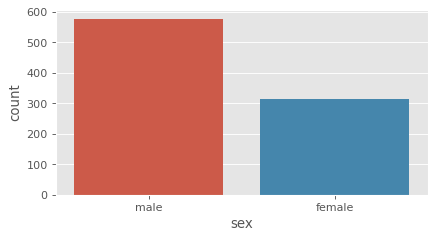

In [64]:
# plot total count of male and female passengers
sns.countplot(x ='sex', data = titanic)
plt.show()

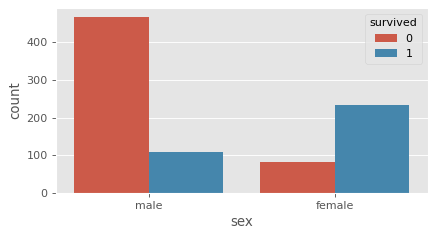

In [67]:
# plot total count and total survived by sex
sns.countplot(x ='sex', data = titanic, hue = 'survived') 
plt.show()

Note that this graph shows us the same information we noted before using count(), but it is very easy to see the descrepancy of survival rates between males and females.

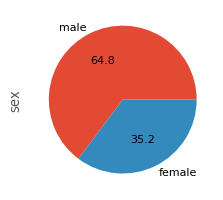

In [71]:
# percentages of male and female passengers shown in pie chart
titanic['sex'].value_counts().plot.pie(autopct = '%1.1f')
plt.show()

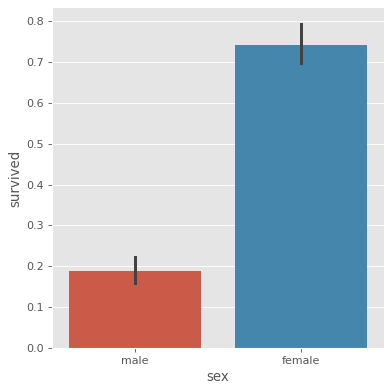

In [72]:
# see probability of survival with bar plot
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic)
plt.show()


These rates are what we noted after using count() (74% vs 19% for respective survival rates), but the visualization drives home the point.  We can further separate this data out on another variable, such as passenger class.

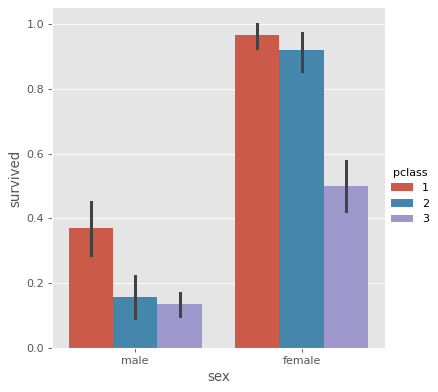

In [73]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, hue = 'pclass')
plt.show()

Interestingly, the lowest class females have a higher survival rate than all males (first, second and third class).  This suggests that gender is a more important variable than class in terms of survival. For females, the survival rate between first and second class is similar, and it plummets for third class females.  Recall that third class passengers (of all genders) were kept to the lower decks with locked gates, which could explain the jump between second and third class female survival rates.

### Subplots

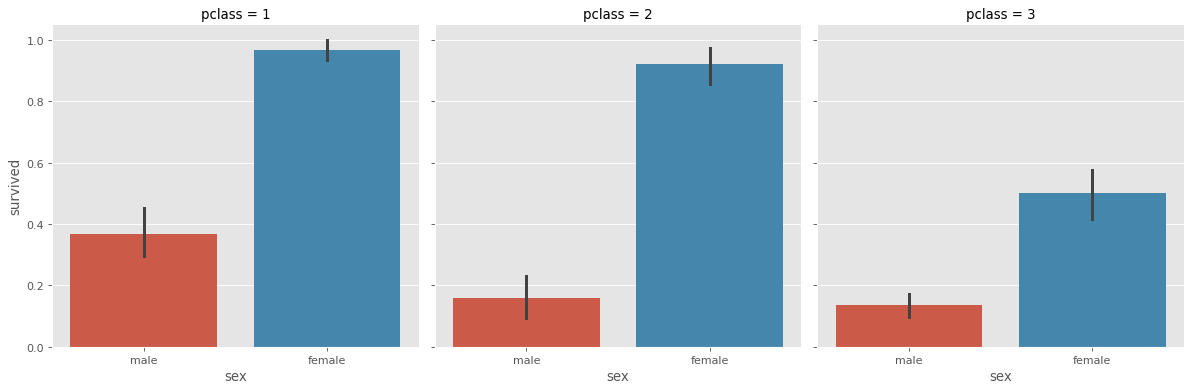

In [74]:
# break out information in plot above into subplots by setting col instead of hue to pclass
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = titanic, col = 'pclass')
plt.show()

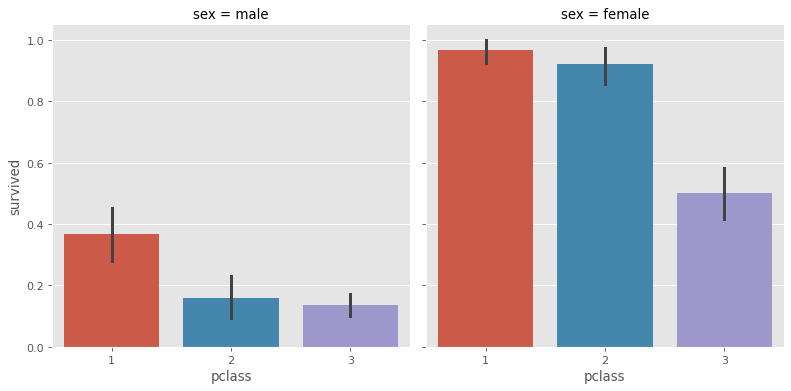

In [75]:
# if we prefer to plot with pclass on the x axis and plots separated by sex, swap x and col assignments
sns.catplot(x = 'pclass', y = 'survived', kind = 'bar', data = titanic, col = 'sex')
plt.show()

In each plot, the trend is decreasing (lower survival rates for lower classes).  However, the survival rate for females is markedly higher.

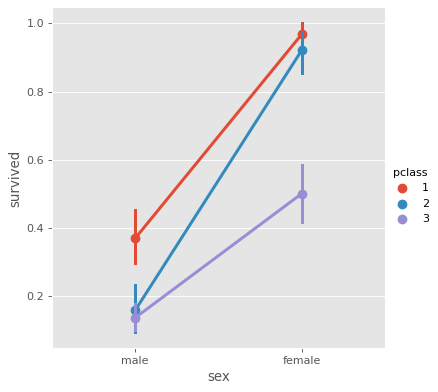

In [77]:
sns.catplot(x = 'sex', y = 'survived', kind = 'point', data = titanic, hue = 'pclass')
plt.show()

We can look at point plots to present the same information.  The x-axis does not represent a continuous variable, so we don't want to interpret slope in the usual way.  However, notice that there is greater change in survival rates between the two blue dots (steeper slope), indicating for second class passengers, it makes more of a difference in survival if a passenger is female than for other classes.

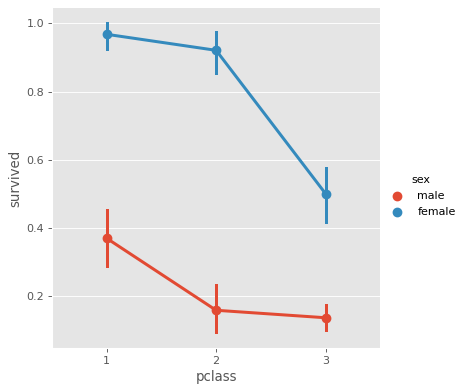

In [78]:
# we can swap pclass and sex
sns.catplot(x = 'pclass', y = 'survived', kind = 'point', data = titanic, hue = 'sex')
plt.show()

This indicates that as you change class from 1 to 2, there is not much change in survival probability for females (leftmost blue point to next blue point).  However, there is a greater change for males (leftmost red point to next red point).  (Notice the line segment declines more steeply.)  As you change class from 2 to 3, there is now a greater impact on surival of females (second blue point to rightmost blue point) compared to males (second red point to rightmost redpoint).
Notice that we made a similar plot above, but the information for males and females was not separted, so we did not see that the trends were different for each sex.  The previous graphs showed that as class changes, survival rates drop dramatically, which is true, but by separating out the data into sex, we can make a more nuanced observation about the survival rate decrease.

### Age

Age is a continuous variable in this data set.  This contrasts to the categorical variables like sex or survived.  We have a few specific plots which are appropriate for visualizing continuous variables.

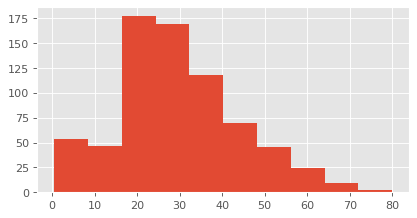

In [83]:
# histogram rather than barplot since age is a continuous variable
titanic['age'].hist()
plt.show()

We can control the bin size in histograms, the color, and add an axis label.

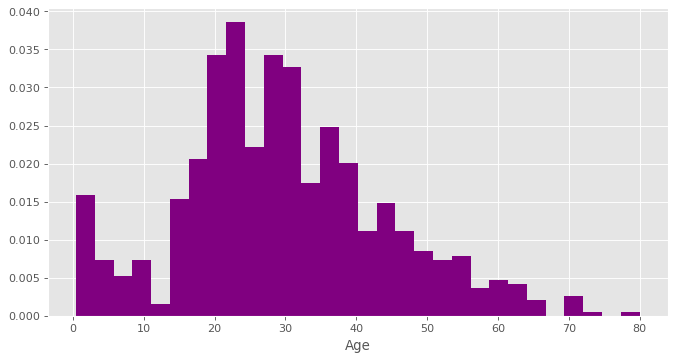

In [171]:
titanic['age'].hist(bins = 30, density = True, color = 'purple', figsize = (10,5))
plt.xlabel('Age')
plt.show()

This plot helps us visualize the age distribution of passengers.  Notice that there is a relatively high number of young children (leftmost bar).  We also see that age looks to be clustered around 20 something and 30 something year old.  There are also some seniors present, with the oldest passengers under 80 years old.

/Users/kamilalarripa/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


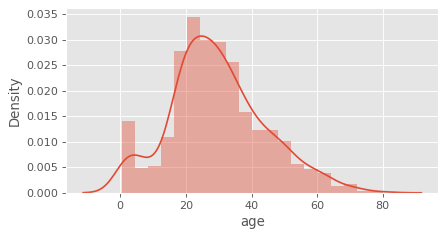

In [89]:
sns.distplot(titanic['age'])
plt.show()

The distplot fits a probability density curve to the histogram.  The area under this curve is always one.  This is a deprecated function, so we might eventually migrate to one of their suggestions in the warning.  This plot has the advantage of showing both the histogram and the continuous probability density function.

### Boxplots
A boxplot is a standardized way of displaying a dataset based on a five number summary:
- the minimum ($Q_0$), the lowest data point excluding any outliers
- the maximum ($Q_4$), the highest data point excluding any outliers
- the median ($Q_2$), the middle value in a data set
- the first quartile/lower quartile ($Q_1$), the median of the lower half of the data set
- the third quartile/upper quartile ($Q_3$), the median of the upper half of the data set.

The interquartile range ($IQR$) is defined to be $Q_3-Q_1$

The box is drawn from $Q_1$ to $Q_3$ with a horizontal line to denote the median.
Whiskers are drawn  either
- in a very straightforward way, using the minimum and maximum of the data set, or
- 1.5 times the IQR (as done in the plot below).

In a box plot, outliers are defined as data located outside of the whiskers.



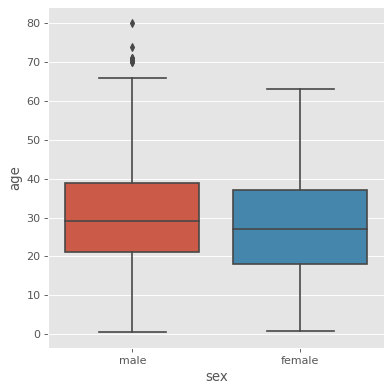

In [91]:
sns.catplot(x = 'sex', y = 'age', data = titanic, kind = 'box')
plt.show()

The boxplot show the median age (black horizontal bar in middle of the box, the first and third quartiles (bottom bound and top bound of box, respectively), as well as outliers (points in the upper left).  A few observations: the median age of females is a bit lower than males.  The maximum age of females was about 63, whereas for males it was 80. 

We can further break this boxplot out by passenger class by setting hue equal to that variable.

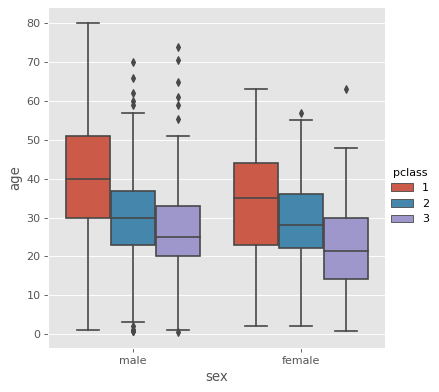

In [92]:
sns.catplot(x = 'sex', y = 'age', data = titanic, kind = 'box', hue = 'pclass')
plt.show()

Notice that age decreases as class changes.  One way to interpret this result is that wealth is accumulated over time, so being older makes it more likely a passenger can afford a more expensive fare.  Instead of hue we can use col to break this information into three plots, separated by class.

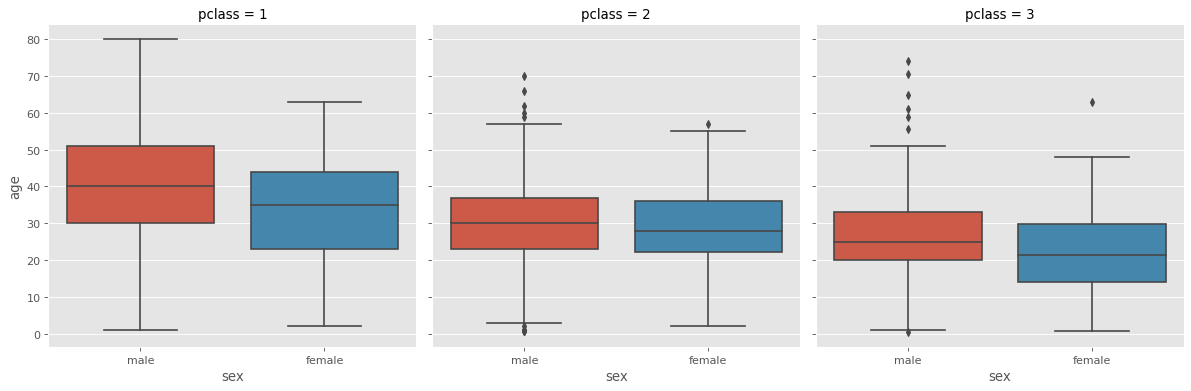

In [93]:
sns.catplot(x = 'sex', y = 'age', data = titanic, kind = 'box', col = 'pclass')
plt.show()

### Violin Plot

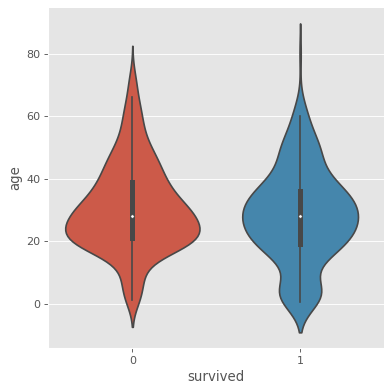

In [95]:
# violin plot showing the age densities of passengers who perished and survived, respectively
sns.catplot(x = 'survived', y = 'age', kind = 'violin', data = titanic)
plt.show()

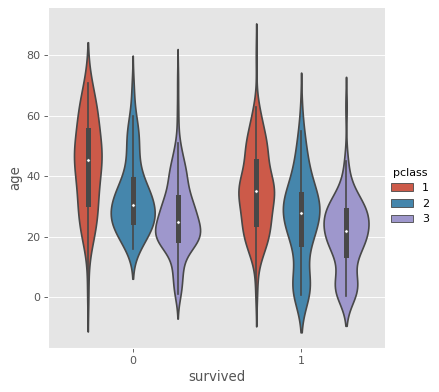

In [80]:
# violin plot showing the age densities of passengers who perished and survived, respectively, broken out by class
# by using hue, we can incorporate one more variable into this information
sns.catplot(x = 'survived', y = 'age', kind = 'violin', data = titanic, hue = 'pclass')
plt.show()

A violin plot is a hybrid of a box plot and a (rotated) kernel density plot, and is used to visualize the distribution of numerical data.  The kernel density is basically a smoothing for a probabilty densisty estimation.  It is similar to a histogram, but is endowed with properties such as smoothness and continuity by using a suitable kernel.  A violin plot is more informative than a plain box plot. While a box plot only shows summary statistics such as mean/median and interquartile ranges, the violin plot shows the full distribution of the data. The difference is particularly useful when the data distribution is multimodal (more than one peak). The wider portion of the violin indicates the higher density and the narrow regions represent relatively lower density.  We see the presence of different peaks, their position and relative amplitude.   The quartile and whisker values from the boxplot are also present inside the violin.  The white dot represents the median.  The upper edge of the black box represents the third quartile and the lower edge represents the first quartile.  The bounds of the black line are the minimum and maximum, respectively.
Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.
A few observations from this graph: when considering survivors, the survivor's median age decreases across classes.  For second class passengers, those who perished have an age that is more clustered around thirty, whereas those who survived have a larger variance (the blue violin on the right is much more elongated).

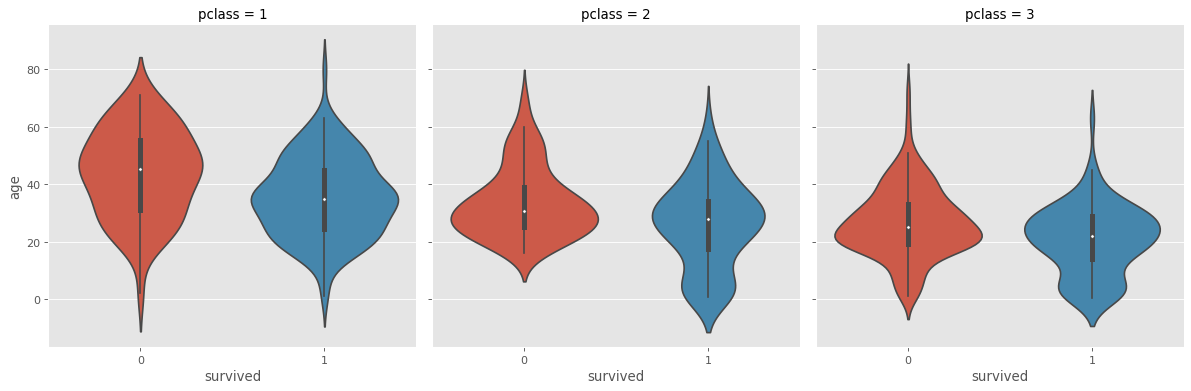

In [81]:
# stylistically, we can separate the above plot into subplots based on class
sns.catplot(x = 'survived', y = 'age', kind = 'violin', data = titanic, col = 'pclass')
plt.show()

The violin plot also has a split option if hue has just two categories.  Visually, this can make it a bit easier to compare densities across those categories.  The first figure below is an example without the split, and the second uses a split.  Because violin plots have symmetry, we do not lose any information using the split, and the figure is less cluttered and easier to compare.  It is a bit more elegant, but you lose the five number summary contained in boxplots and standard violin plots.

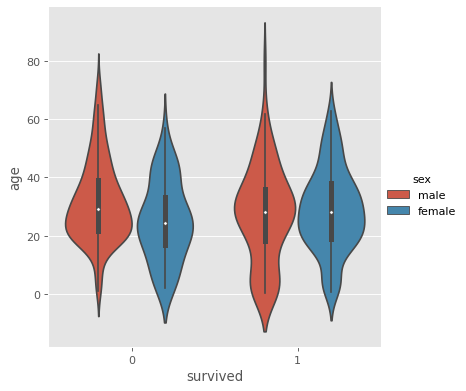

In [98]:
sns.catplot(x = 'survived', y = 'age', kind = 'violin', data = titanic, hue = 'sex')
plt.show()

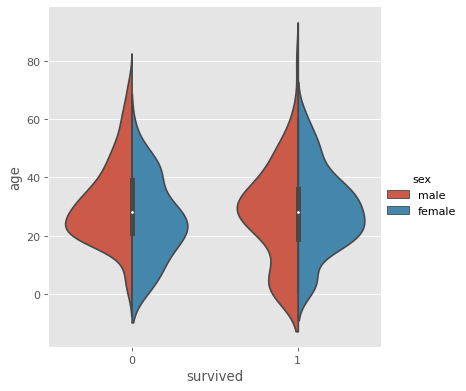

In [97]:
# violin plot split on sex.  This works only if hue is set to a variable with 2 categories.
sns.catplot(x = 'survived', y = 'age', kind = 'violin', data = titanic, hue = 'sex', split = True)
plt.show()

### Swarm Plot

A swarm plot is a type of scatterplot used for representing categorical values.  Seaborn swarmplot is similar to stripplot, but the points are adjusted so they don't overlap each other.  Just like in the previous examples, another dimension can be added by using coloring the points, using the hue parameter.

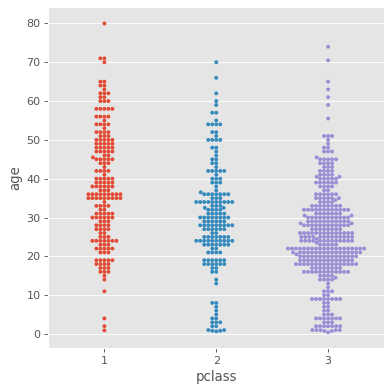

In [115]:
sns.catplot(x = 'pclass', y = 'age', kind = 'swarm', data = titanic, s = 3.5) # s controls the dot size
plt.show()

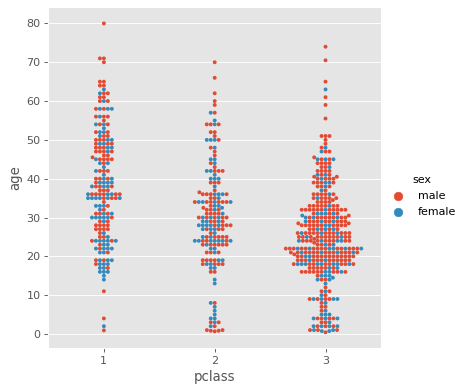

In [113]:
# this allows us to color the points based on another variable, sex
sns.catplot(x = 'pclass', y = 'age', kind = 'swarm', data = titanic, hue = 'sex', s = 3.5)
plt.show()

This figure is a little cluttered, so an alternative is to separate this information into two figures based on sex.  Changing hue to col will do this.

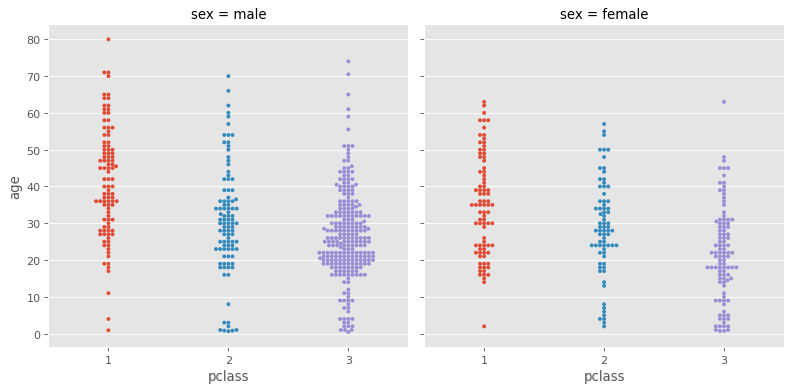

In [116]:
# this allows us to separate the data into two figures based on sex
sns.catplot(x = 'pclass', y = 'age', kind = 'swarm', data = titanic, col = 'sex', s = 3.5)
plt.show()

We see there are more male passengers that female passengers traveling in third class (compare purple dots in each figure).

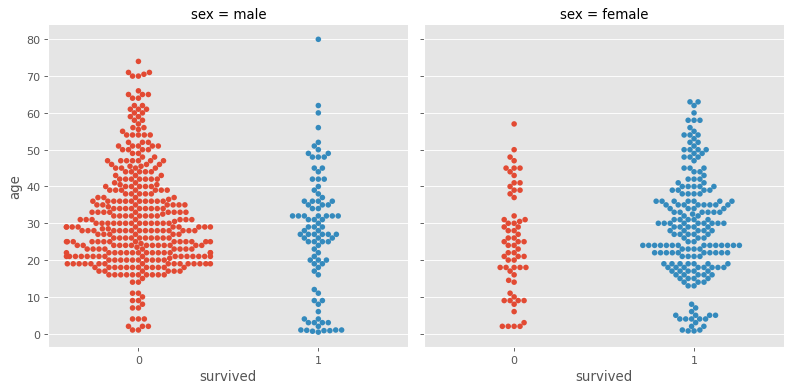

In [119]:
sns.catplot(x = 'survived', y = 'age', data = titanic, kind = 'swarm', col = 'sex')
plt.show()
# if you get a warning about dot size, either change the size, or run a second time to remove the warning

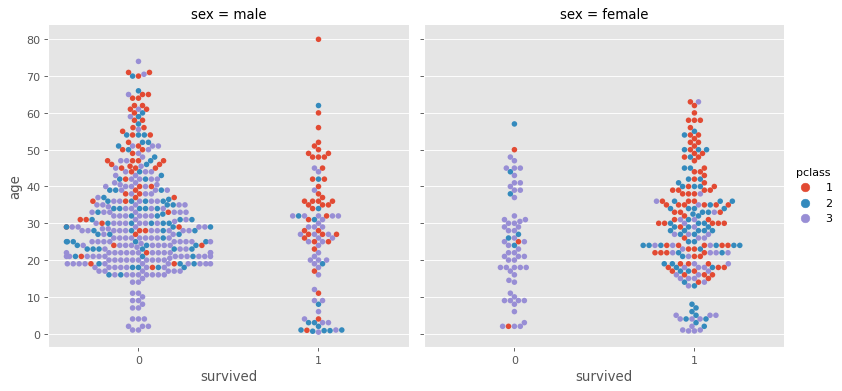

In [120]:
# we can incorporate one more variable using hue = pclass
sns.catplot(x = 'survived', y = 'age', data = titanic, kind = 'swarm', col = 'sex', hue = 'pclass')
plt.show()

We notice there are many male third class passengers who don't survive, and there age is generally realtively young.  (To see this, look at the purple dots in the left figure over 0 and where they are located vertically).

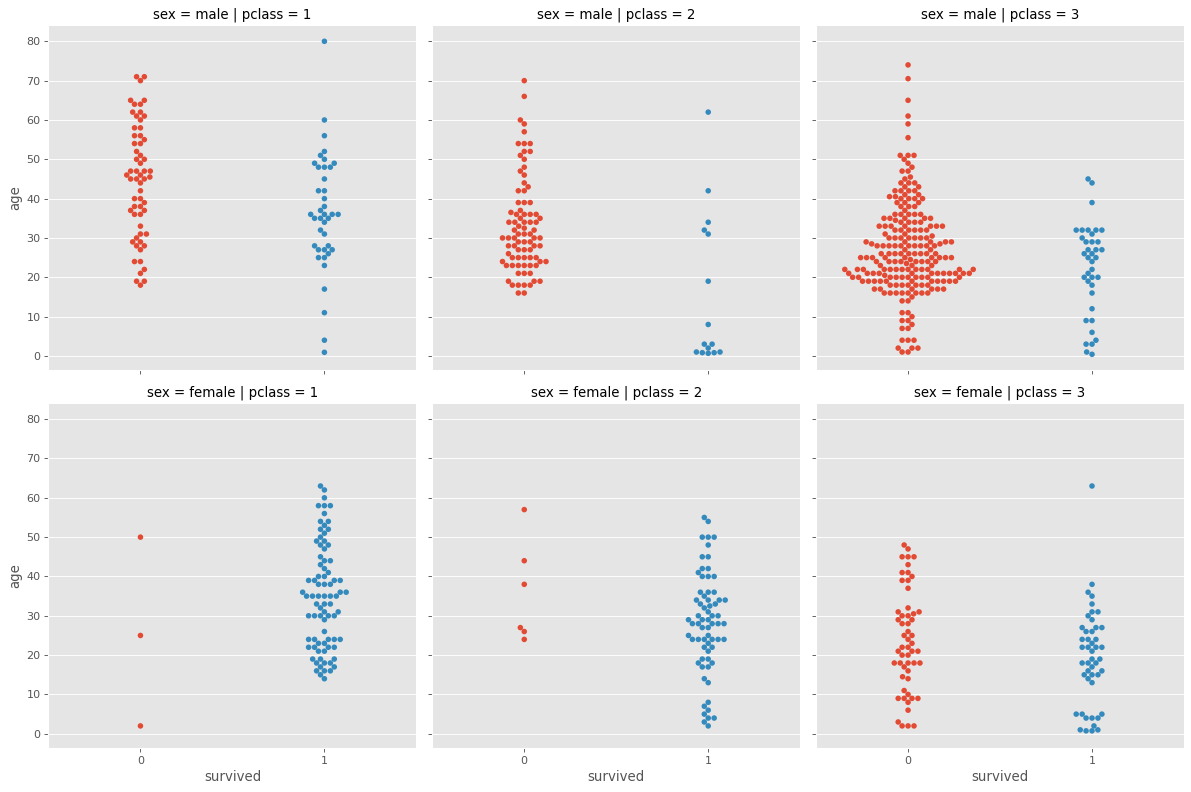

In [122]:
# we can also separate out into more plots by setting row to a variable rather than hue
sns.catplot(x = 'survived', y = 'age', data = titanic, kind = 'swarm', col = 'pclass', row = 'sex')
plt.show()

A few observations: (1) Consider the graph for third class females.  An almost equal number survived and died.  Now consider the graph for first class females.  Very few died, and most survived.  Pull back and notice that these six graphs break down data into distinct groups for nuanced observations.  We are able to simulatneously consider survival, age, sex and class in the figures.

### FacetGrid
FacetGrid lays out plots in a two dimensional grid.
The plot below shows the kde plots for age distribution across the three classes.

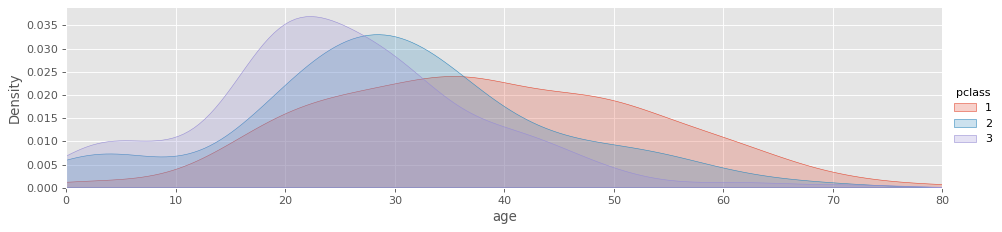

In [161]:
fig = sns.FacetGrid(titanic,hue='pclass',aspect=4)
fig.map(sns.kdeplot,'age',shade=True)
oldest = titanic['age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()
plt.show()

We can see that age tends to be younger for the third class passengers (peak of purple curve), and older for the first class passengers (peak of red curve).  We also see that the ages for first class passengers are more spread out (the variance is higher).  The information presented is similar to what we see in some of the swarm plots above, but this graphic is more elegant.

### Family Structure
The data set contains a variable for the number of siblings/spouses aboard (Sibsp) and a variable for the number of parents/children aboard (Parch).  We might hypothesize that having family members aboard would influence to outcome for an individual.

### Sibling and Spouse Relationships


In [123]:
titanic['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

This tells us 608 passengers were traveling alone, 209 passengers had one sibling or spouse on board, 28 people had two (e.g., a woman traveled with a husband and brother), etc.  We can also see this information a countplot.

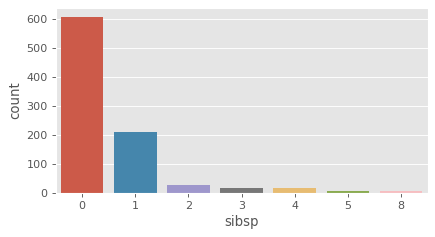

In [126]:
sns.countplot(x = 'sibsp', data = titanic)
plt.show()

We are curious how family support relates to survival so we can break the data out by using the hue parameter.

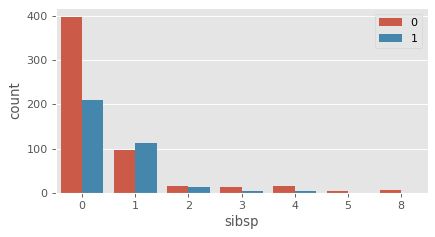

In [131]:
sns.countplot(x = 'sibsp', data = titanic, hue = 'survived')
plt.legend(loc='upper right') # keep legend out of the way
plt.show()

Let's compare people traveling alone to people traveling with one sibling or a spouse.  For passengers traveling alone, the number of surviors is about half of the number of people who perished (the leftmost blue rectangle is about half the height of the leftmost red rectangle).  However, having one family member greatly improves the chance of survival with the odds tipping towards survival (the two rectangles are close to the same size, with the blue rectangle slightly taller).  This plot is for total counts, not probabilities, but we can adjust our plot to depict probabilities of survival.

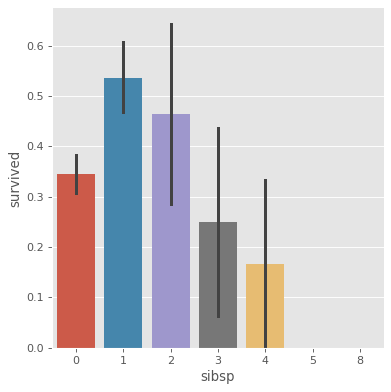

In [130]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = titanic)
plt.show()

This plot relates to the information in the previous plot.  For example, we see that about 35% of people traveling alone survived (red leftmost rectanlge).  This indicates about 65% did not.  This is the same information as contained in the two leftmost bars of the countplot, discussed above.  We also observe that having one sibling our spouse is the best situation.  Do you have a hypothesis as to why having more family members beyond one spouse or sibling decreases survival rates?

We might want to separate out this information into males and females.

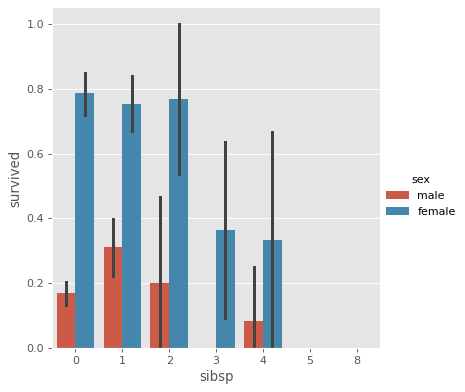

In [132]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = titanic, hue = 'sex')
plt.show()

If we consider only females, there is not much difference in survival whether they are traveling alone, or with 1 or 2 spouse/siblings.  Their survival rate drops if traveling with 3 or more spouse/siblings.  We also see reinforced a theme we have already explored-- females have a pretty high survival rate compared to males.

As before, we can separate out the data in this plot by changing hue to col.  This will create one subplot for males and one for females.

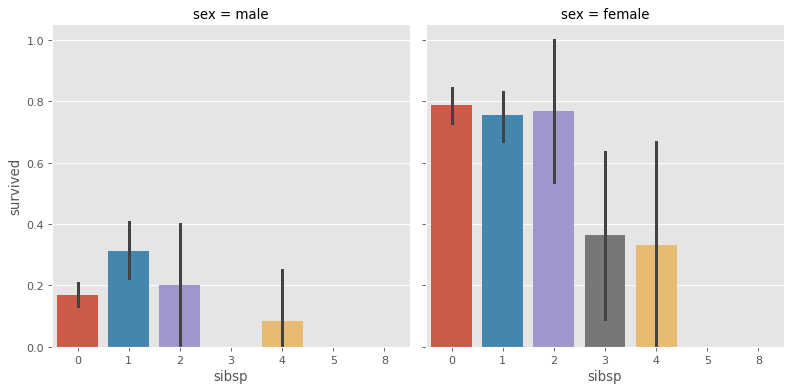

In [133]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = titanic, col = 'sex')
plt.show()

We can also separate out data on passenger class rather than sex.  

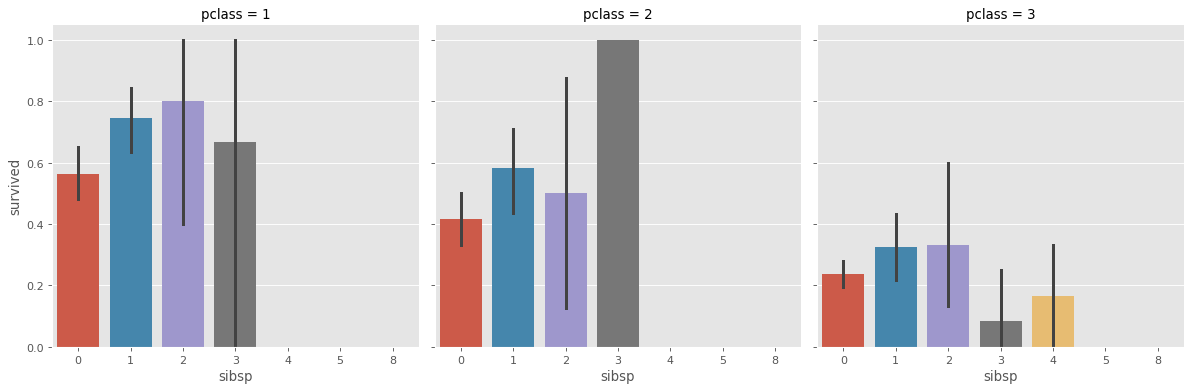

In [134]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = titanic, col = 'pclass')
plt.show()

This reveals something we did not see in the grouped data.  For second class passengers, having 3 spouse/siblings significantly increased the survival rate.

### Parent Child Relationships

In [135]:
titanic['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

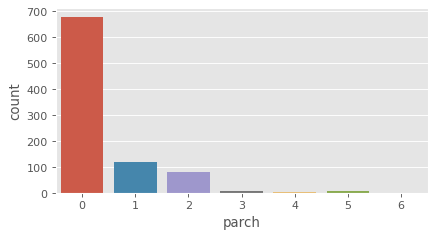

In [136]:
sns.countplot(x = 'parch', data = titanic)
plt.show()

This shows us that the majortity of passengers were traveling without children.  How does the parent-child relationship affect survival?

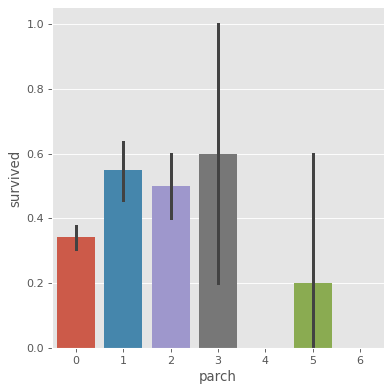

In [139]:
sns.catplot(x = 'parch', y = 'survived', data = titanic, kind = 'bar')
plt.show()

Note, although the total counts can be low (see for example, the heights of the blue rectangle and purple rectangle in the countplot), the probability of survival in those categories is relatively high.

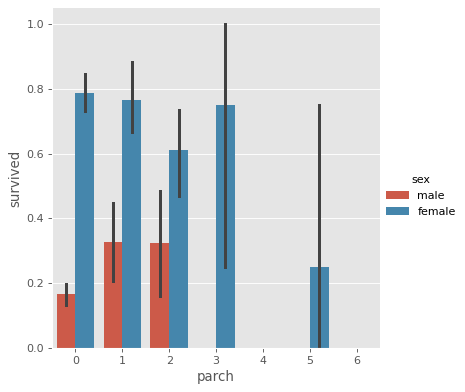

In [169]:
sns.catplot(x = 'parch', y = 'survived', data = titanic, kind = 'bar', hue = 'sex')
plt.show()

### Creating a new variable
We might be interested in combining the parch and sibsp variables to know the total number of family members for a passenger.  

In [168]:
# create new column called NumberFamilyMembers
titanic['NumberFamilyMembers'] = titanic['parch'] + titanic['sibsp']
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,NumberFamilyMembers
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


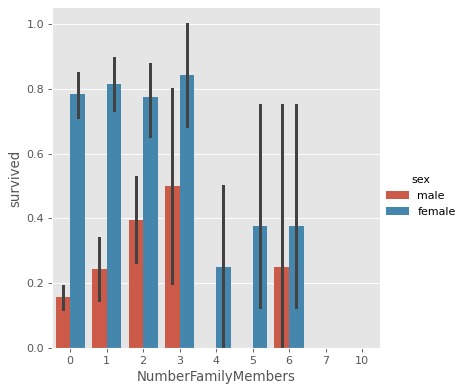

In [170]:
sns.catplot(x = 'NumberFamilyMembers', y = 'survived', data = titanic, kind = 'bar', hue = 'sex')
plt.show()

### Port of Embarkment
The data set contains three ports of embarkment: Cherbourg, France, Queenstown, Ireland, and Southampton, England.  The ship was built in Belfast, Ireland and started her journey from Southampton, then sailed across the English Channel to Cherbourg, France (in Normandy), and then to Queenstown (now called Cobh) before crossing the Atlantic.  These ports of embarkment are encoded in the data by the first letter of each location.

In [141]:
titanic['embarked'].value_counts()


S    644
C    168
Q     77
Name: embarked, dtype: int64

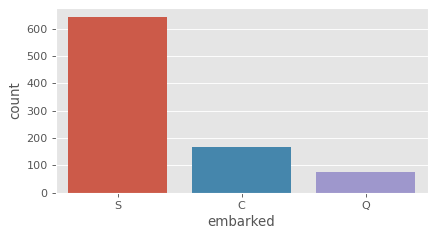

In [145]:
sns.countplot(x = 'embarked', data = titanic)
plt.show()

We see most passengers came from Southampton.  We might be interested in how the point of origin relates to survival.

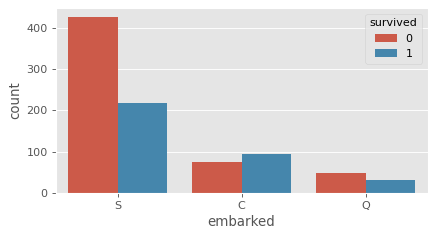

In [147]:
sns.countplot(x = 'embarked', data = titanic, hue = 'survived')
plt.show()

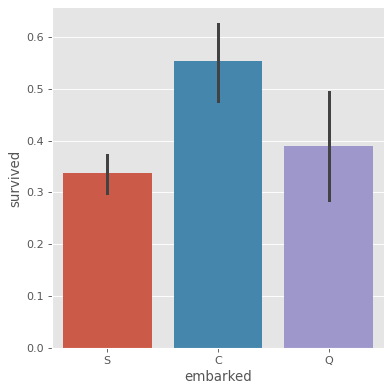

In [149]:
sns.catplot(x = 'embarked', y = 'survived', kind = 'bar', data = titanic)
plt.show()

It's interesting that people who embarked at Cherbourg had a much higher probability of surival.  Why would this be?  We have learned from our previous analysis that females fared better on the Titanic, so it might be useful to break this data down by sex (using either hue = 'sex' or col = 'sex')

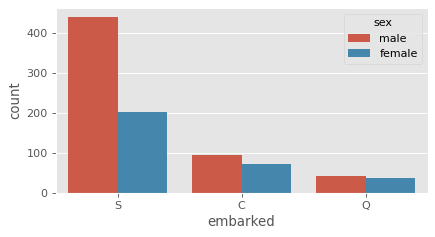

In [152]:
sns.countplot(x = 'embarked', data = titanic, hue = 'sex')
plt.show()

We see that the number of males and females is fairly close for the ports of Cherbourg and Queenstown, but for the port of Southampton, male passengers dominated.

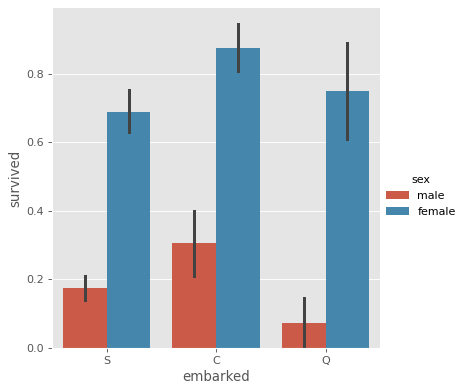

In [150]:
sns.catplot(x = 'embarked', y = 'survived', kind = 'bar', data = titanic, hue = 'sex')
plt.show()

### Man, Woman or Child
The data sets contains a variable 'who' which identifies a passenger as either a man, a woman, or a child.

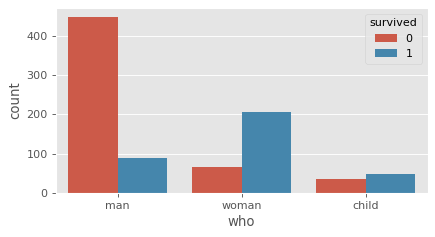

In [154]:
sns.countplot(x = 'who', data = titanic, hue = 'survived')
plt.show()

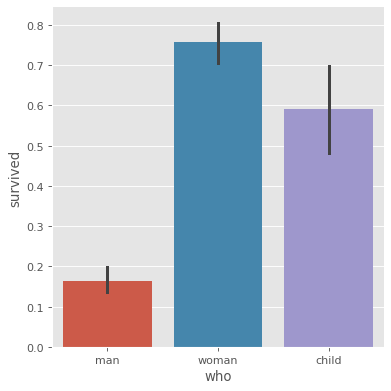

In [155]:
sns.catplot(x = 'who', y = 'survived', kind = 'bar', data = titanic)
plt.show()

How does this break down by class?

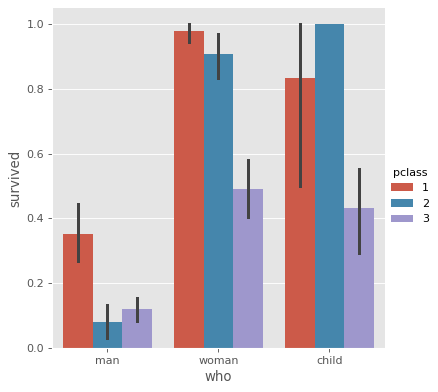

In [156]:
sns.catplot(x = 'who', y = 'survived', kind = 'bar', data = titanic, hue = 'pclass')
plt.show()


## References

- Dorling, Danny. Health Inequalities: From Titanic to the Crash. Policy Press, 2013.
- Elinder Mikael and Erixson, Oscar.  Gender, social norms, and survival in maritme disasters.  Proceedings of the National Academy of Sciences, 109(33), 2012.
- Frey, Bruno S., David A. Savage, and Benno Torgler. "Behavior under extreme conditions: The Titanic disaster." Journal of Economic Perspectives 25.1 (2011): 209-222.
- Hall, Wayne. Social class and survival on the SS Titanic. Social science & medicine 22.6 (1986): 687-690.
- Pearson, Jay A. Can't buy me whiteness: New lessons from the Titanic on race, ethnicity, and health. Du Bois Review: Social Science Research on Race 5.1 (2008): 27-47.
